In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Model architecture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
# Data processing
from tensorflow.keras.utils import to_categorical
# model
from tensorflow.keras import optimizers 
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
data_path = os.getcwd()
data_path = data_path + '/drive/MyDrive/ML_projects/CIFAR10/data/'

# #train path
# train_data_path = data_path + '\\train\\'
data_path

'/content/drive/MyDrive/ML_projects/CIFAR10/data/'

In [ ]:
images = pd.read_json(data_path + 'img_labeled.json')
images.head()

,images,label
0,"[[[63, 62, 59], [45, 46, 43], [43, 48, 50], [4...",frog
1,"[[[187, 177, 154], [136, 137, 126], [95, 104, ...",truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",truck
3,"[[[10, 25, 28], [19, 34, 37], [20, 35, 38], [2...",deer
4,"[[[198, 180, 170], [196, 178, 168], [203, 185,...",automobile


## Train , Test and Validation values

In [ ]:
## convert all images array to ndarray
x_train = images['images'].values
for i in range(len(x_train)):
    x_train[i] = np.array(x_train[i],dtype='float32')
# X_train,X_test,Y_train,Y_test = train_test_split(x_train,images['label'].values,test_size=0.2,random_state=0)
X_train = x_train[:30000]
X_test = x_train[30000:40000]
X_val = x_train[40000:]
# normalize X_train and Y_train between 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255

# train values
arr = []
for i in range(len(X_train)):
    arr.append(X_train[i])
X_train = np.array(arr)

# test values
arr = []
for i in range(len(X_test)):
    arr.append(X_test[i])
X_test = np.array(arr)

# validation values
arr = []
for i in range(len(X_val)):
    arr.append(X_val[i])
X_val = np.array(arr)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'X validation shape: {X_val.shape}')

### Y train, test and validation

y = images['label'].values
Y_train = y[:30000]
Y_test = y[30000:40000]
Y_val = y[40000:]
Y_test


X train shape: (30000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)
X validation shape: (10000, 32, 32, 3)


array(['airplane', 'frog', 'airplane', ..., 'frog', 'bird', 'ship'],
      dtype=object)

truck


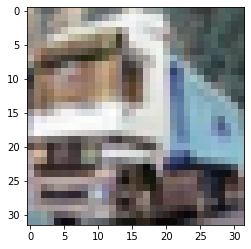

In [ ]:
plt.imshow(X_train[1])
print(Y_train[2])

In [ ]:
labels = images['label'].unique().tolist()
print(labels)

['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog', 'airplane']


In [ ]:
# label encoding
for i in range(len(Y_train)):
  Y_train[i] = labels.index(Y_train[i])

Y_train[0]
for i in range(len(Y_test)):
  Y_test[i] = labels.index(Y_test[i])
Y_test[0]

for i in range(len(Y_val)):
  Y_val[i] = labels.index(Y_val[i])
# # le = LabelEncoder()
# # Y_train = le.fit_transform(Y_train)
# # Y_test = le.fit_transform(Y_test)
# # Y_val = le.fit_transform(Y_val)
# ## convert label to one hot encoding
Y_train = to_categorical(Y_train,len(labels))
Y_test = to_categorical(Y_test, len(labels))
Y_val = to_categorical(Y_val, len(labels))
print(Y_train[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
max(Y_train[1])
labels[int(max(Y_train[1]))]

'truck'

In [ ]:
batch_size = 32 
epochs = 50

## Model

In [ ]:
# first model details
# batch size 32
# kernal size = 3x3
# 3 layers

model_32_3 = Sequential()
model_32_3.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=X_train.shape[1:]))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Conv2D(32,kernel_size=3,activation='relu'))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Conv2D(32,kernel_size=3,activation='relu'))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Dropout(rate=0.2))

model_32_3.add(Flatten())
model_32_3.add(Dense(64,activation='relu'))

model_32_3.add(Dense(10,activation='softmax'))

model_32_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model_32_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [ ]:
history = model_32_3.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,Y_val))

Epoch 1/50
938/938 [==============================] - 28s 29ms/step - loss: 1.8553 - accuracy: 0.3067 - val_loss: 1.5696 - val_accuracy: 0.4223
Epoch 2/50
938/938 [==============================] - 26s 28ms/step - loss: 1.5387 - accuracy: 0.4353 - val_loss: 1.4283 - val_accuracy: 0.4765
Epoch 3/50
938/938 [==============================] - 26s 28ms/step - loss: 1.4066 - accuracy: 0.4906 - val_loss: 1.3229 - val_accuracy: 0.5239
Epoch 4/50
938/938 [==============================] - 26s 28ms/step - loss: 1.3283 - accuracy: 0.5205 - val_loss: 1.3037 - val_accuracy: 0.5356
Epoch 5/50
938/938 [==============================] - 26s 28ms/step - loss: 1.2729 - accuracy: 0.5418 - val_loss: 1.2446 - val_accuracy: 0.5585
Epoch 6/50
938/938 [==============================] - 26s 28ms/step - loss: 1.2173 - accuracy: 0.5645 - val_loss: 1.1593 - val_accuracy: 0.5895
Epoch 7/50
938/938 [==============================] - 27s 29ms/step - loss: 1.1817 - accuracy: 0.5783 - val_loss: 1.1459 - val_accuracy:

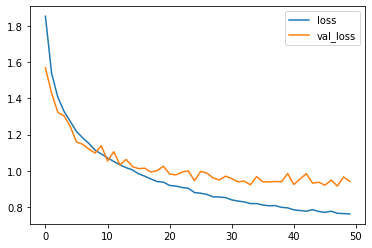

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

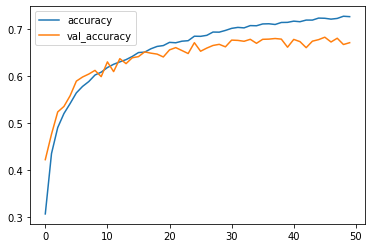

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [ ]:
# evaluate model as score
score = model_32_3.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.9835 - accuracy: 0.6624
Test loss: 0.9835269451141357
Test accuracy: 0.6624000072479248


In [ ]:
model_32_3.save(data_path+'3_layer_32/')

In [ ]:
predect = model_32_3.predict(X_test)
predect

313/313 [==============================] - 3s 9ms/step


array([[1.8458389e-02, 1.3557353e-02, 4.7787349e-03, ..., 4.9414869e-02,
        3.1417047e-03, 1.9258770e-01],
       [8.3866644e-01, 1.1647795e-03, 1.3285204e-02, ..., 6.4060338e-02,
        3.7392233e-02, 1.2456256e-04],
       [2.3173424e-03, 1.3953303e-03, 2.5273312e-03, ..., 1.8774930e-01,
        2.1124111e-02, 3.2285857e-01],
       ...,
       [7.3703021e-01, 4.8211317e-05, 1.7288830e-02, ..., 2.1717513e-01,
        2.3144623e-02, 1.0194734e-05],
       [9.1685756e-04, 1.3550313e-02, 8.5153757e-03, ..., 2.0800852e-03,
        7.6417555e-04, 4.5147136e-01],
       [3.6876495e-03, 4.1866101e-02, 3.0835688e-02, ..., 5.4847617e-02,
        5.9358291e-03, 2.0507460e-02]], dtype=float32)

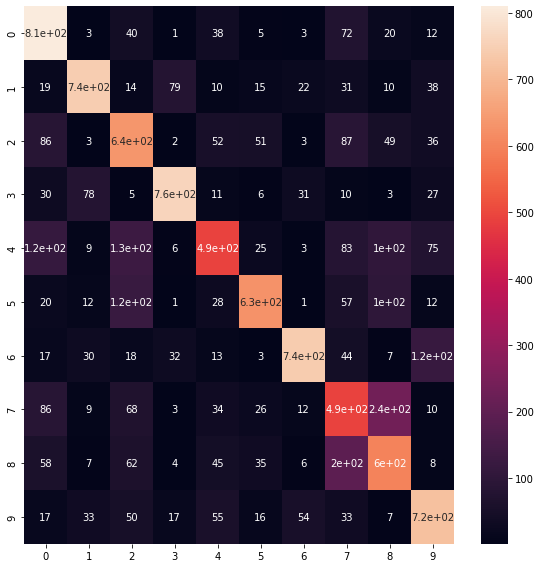

In [ ]:
true_values = np.argmax(Y_test,axis=1)
y_pred = np.argmax(predect,axis=1)

## calcualte error ratio
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true_values,y_pred)
fig,axis = plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True)

fig.tight_layout()
plt.show()

## Plot some test items

## plot 3 images for each label

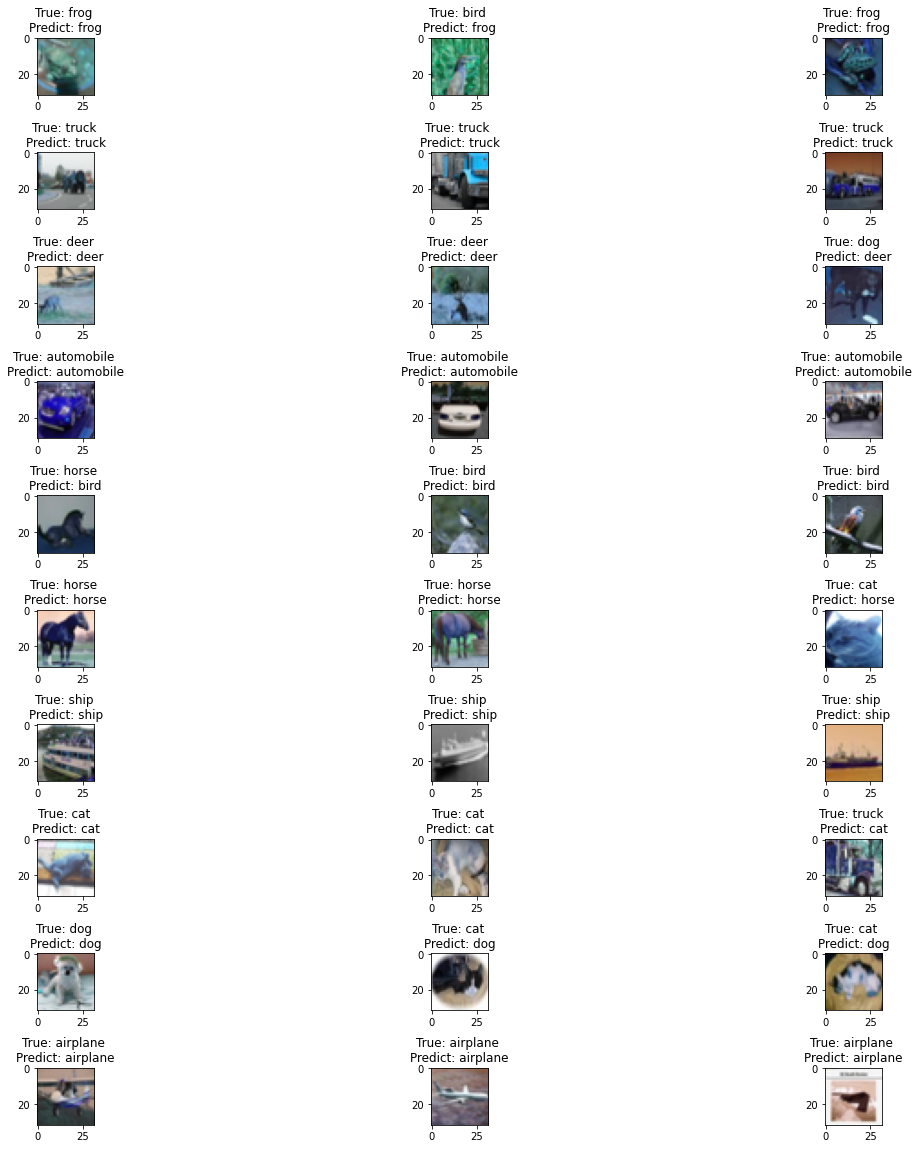

In [ ]:
import random
fig,axis = plt.subplots(10,3,figsize=(20,20))
axis = axis.ravel()
axis = axis.reshape(10,3)

for i in range(len(labels)):
  indexs = []
  for j in range(len(y_pred)):
    if y_pred[j] == i:
      indexs.append(j)
  for j in range(3):
    index = random.choice(indexs)
    axis[i,j].imshow(X_test[index])
    axis[i,j].set_title(f'True: {labels[true_values[index]]} \nPredict: {labels[y_pred[index]]}')
  plt.subplots_adjust(hspace=1)
